# Pipeline for params generation
## Seasonality + FFT

(X) 2. Check for heteroschedasticity  
> OK - Entender o retorno da função  
> OK - Testar com outras séries comprovadamenteo homoesch

( ) 3. if multiplicative, do log transformation  
> Após log transformation, serie não virou hom esch

( ) 4. Decompose and visualize with STL  
( ) 5. Take seasonal curve and apply FFT  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
# from statsmodels.formula.api import ols

# 1. Load and visualize

In [2]:
city='Portland'
data = pd.read_csv('../data/temperature.csv',
                      usecols=['datetime', city],
                      parse_dates=['datetime'],
                      index_col=['datetime'],
                      infer_datetime_format=True,
                      skiprows=[1])

In [3]:
data = data.reset_index()
data.head()

,datetime,Portland
0,2012-10-01 13:00:00,282.080000
1,2012-10-01 14:00:00,282.083252
2,2012-10-01 15:00:00,282.091866
3,2012-10-01 16:00:00,282.100481
4,2012-10-01 17:00:00,282.109095


In [56]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(np.ndarray(amplitude), model='additive')
decomposition.plot()

ValueError: sequence too large; cannot be greater than 32

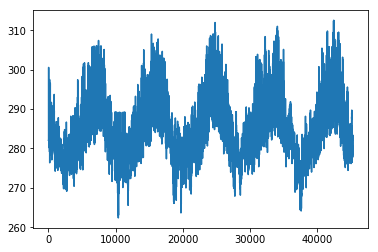

In [4]:
plt.plot([i for i in range(data.shape[0])], data[city])

# 2. Test for heteroschedacity
* In order to use the STL decomposition technique, series must be an additive model. If multiplicative, a log transformation must be done.   
* Therefore, we'll test for heteroschedacity to decide whether a transformation is needed or not  
* There are two testes fo HS: white and breusch-pagan. We'll test both

**1.1 Regression**  
In order to apply either breuschpagan ou white test, the residual of a regression must be passed to the function  
Ordinary Least Squares is used according to tutorials  

In [38]:
def test_heteroschedasticity(y: pd.DataFrame)->bool:
    exog = pd.DataFrame(y) # exog stands for exogenous variable aka 'y'
    
    ols = sm.OLS(exog, [i for i in range(len(exog))])
    regression = ols.fit()
    lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(regression.resid**2, exog)
    
    if f_pvalue<0.05:
        return True
    return False

In [34]:
is_het = test_heteroschedasticity(data[city])
is_het

True

**Testing for a known homoschedastic series**

In [43]:
def gen_series(frequency:int):
    # How many time points are needed i,e., Sampling Frequency
    samplingFrequency = 10
    samplingInterval = 1 / samplingFrequency  # At what intervals time points are sampled

    # Time points - eixo X
    beginTime           = 0
    endTime             = 10;
    time = np.arange(beginTime, endTime, samplingInterval)

    # Frequency of the signals
    signalFrequency = frequency

    # Create two sine waves
    # amplitude = np.sin( 2*np.pi*signalFrequency*time)
    amplitude = np.sin( np.pi*signalFrequency*time)
    # amplitude= np.sin(5)
    return amplitude

In [44]:
curve = gen_series(4)

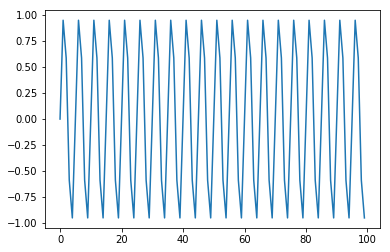

In [45]:
plt.plot(curve)

In [46]:
is_het2 = test_heteroschedasticity(curve)
is_het2

False

# 3. Log transformation

In [47]:
from numpy import log

In [48]:
log_data = log(data[city])

In [49]:
is_het3 = test_heteroschedasticity(log_data)
is_het3

True

# 4. Decompose with STL

# 5. FFT on Seasonal data